## Implementation of linear regression using libraries:-

### Importing the Libraries

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

In [151]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/My Drive


###### (a) (2 marks) Visualize the dataset. Make scatter plots, pair plots, box plots, and correlation heatmap.
###### Distribution plots, i.e. histograms, pie charts etc. for categorical features. Give at least five insights on the dataset.

### Importing the dataset

In [152]:
dataset = pd.read_csv('CO2 Emissions.csv')
dataset

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

### Printing the Dataset Headers

In [153]:
i = 1
for name in list(dataset.columns):
    print(f'{i}.', name)
    i += 1

1. Make
2. Model
3. Vehicle Class
4. Engine Size(L)
5. Cylinders
6. Transmission
7. Fuel Type
8. Fuel Consumption City (L/100 km)
9. Fuel Consumption Hwy (L/100 km)
10. Fuel Consumption Comb (L/100 km)
11. Fuel Consumption Comb (mpg)
12. CO2 Emissions(g/km)


## Visualizing the dataset

### Creating correlation heatmap

<ipython-input-154-171c2a62faad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


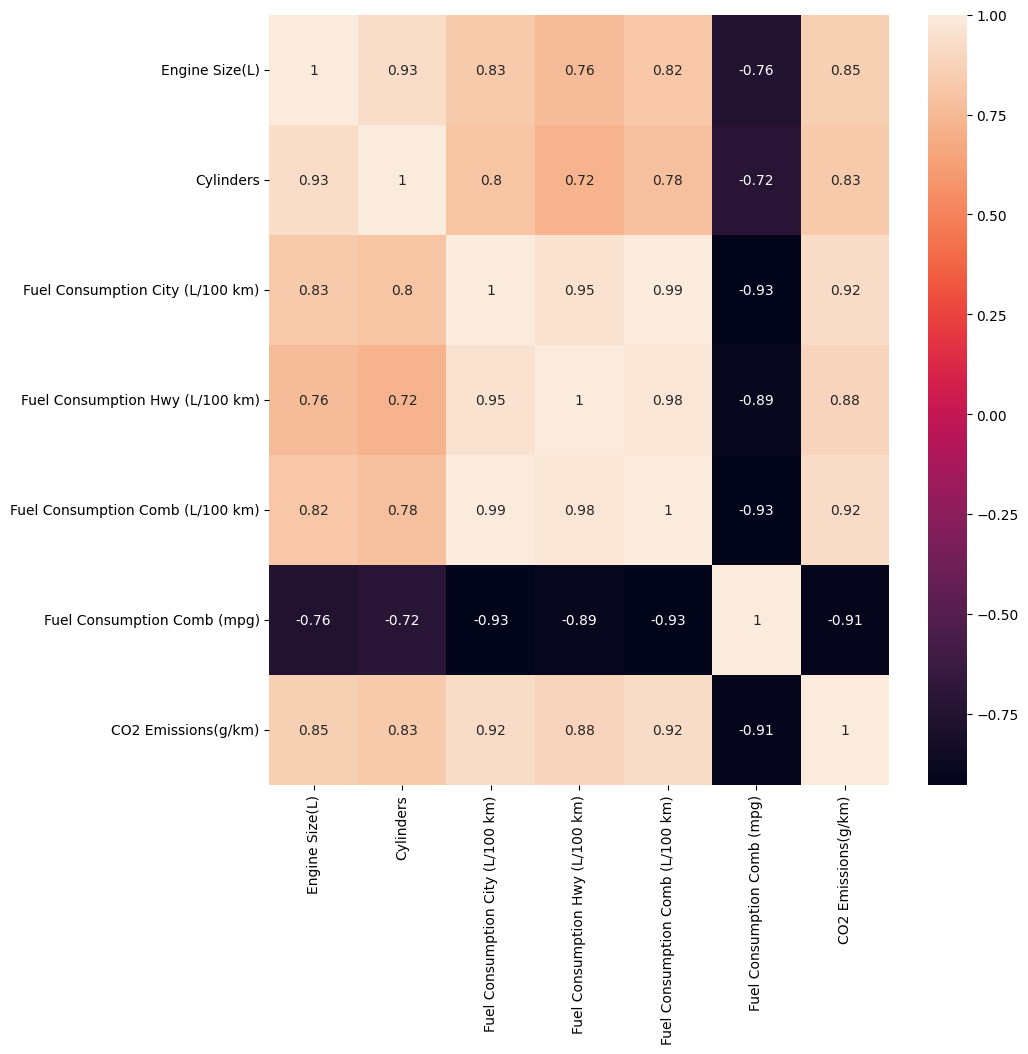

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

### Creating scatterplots for all features v/s CO2 Emissions

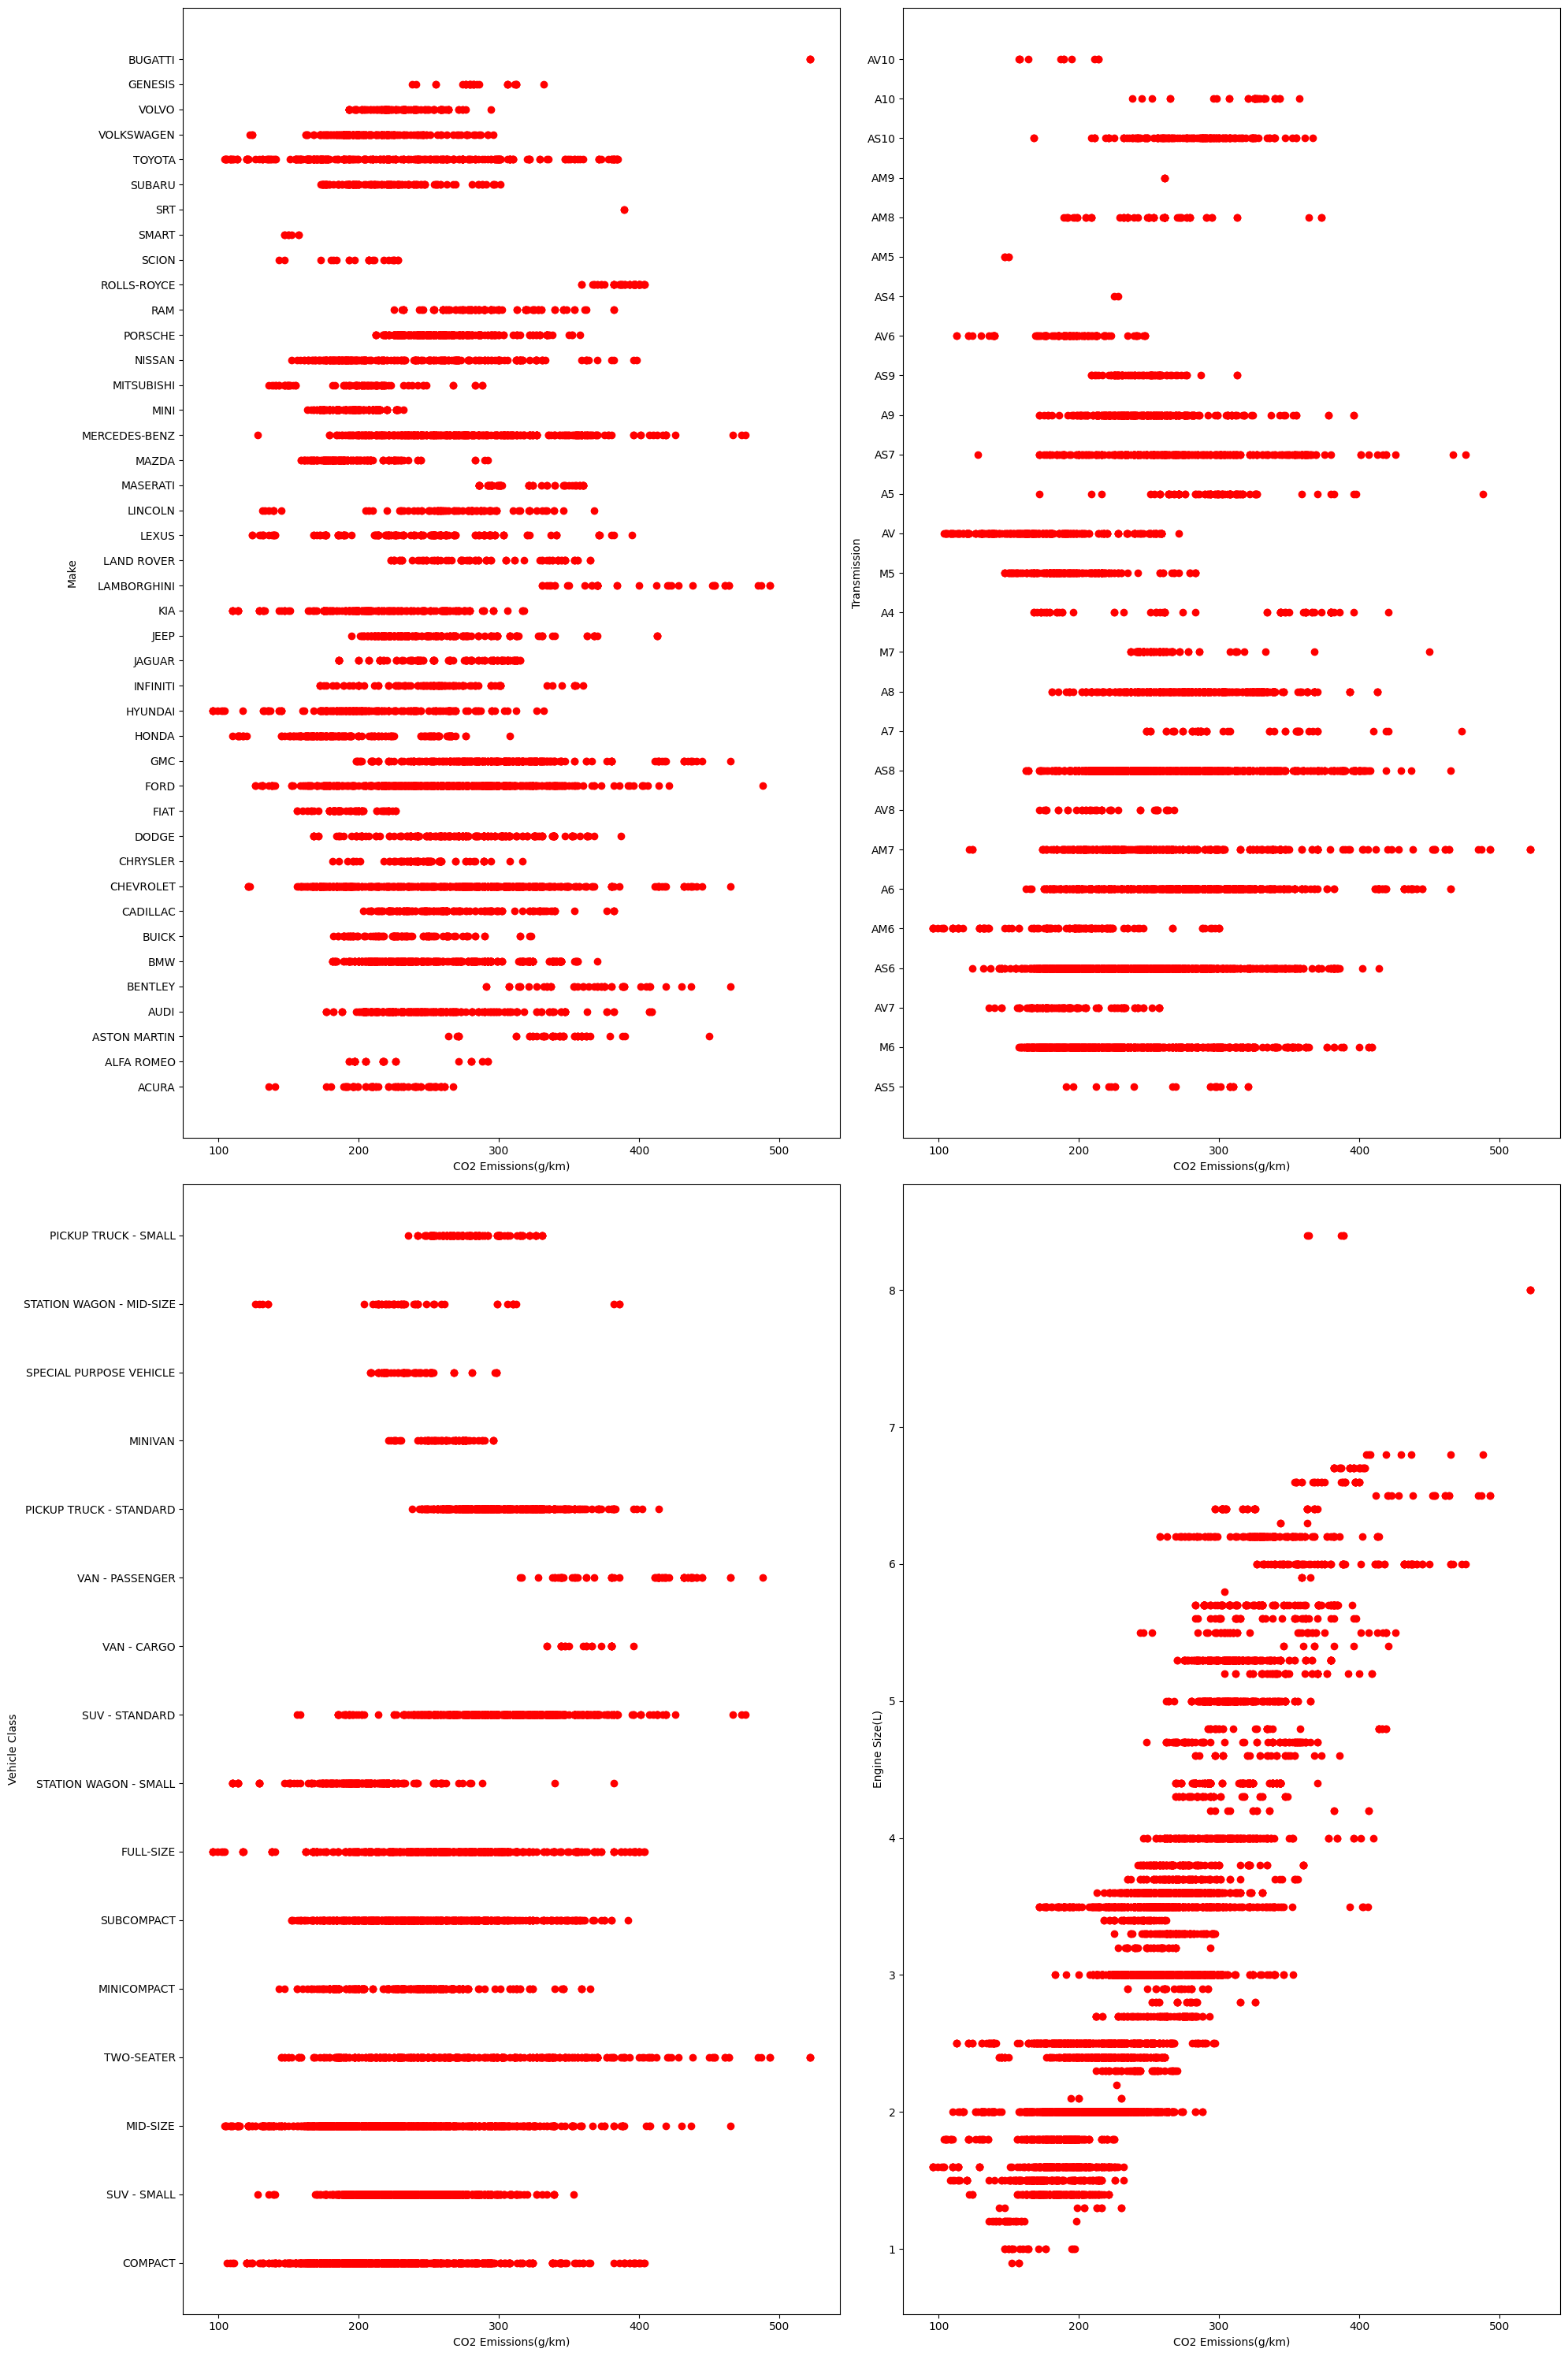

In [155]:
fig, ax = plt.subplots(2,2, figsize=(20,30))

# Making scatter plots
ax[0][0].scatter(y=dataset['Make'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[0][0].set_ylabel('Make')
ax[0][0].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[0][1].scatter(y=dataset['Transmission'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[0][1].set_ylabel('Transmission')
ax[0][1].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[1][0].scatter(y=dataset['Vehicle Class'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[1][0].set_ylabel('Vehicle Class')
ax[1][0].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[1][1].scatter(y=dataset['Engine Size(L)'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[1][1].set_ylabel('Engine Size(L)')
ax[1][1].set_xlabel('CO2 Emissions(g/km)')

plt.tight_layout()
plt.show()

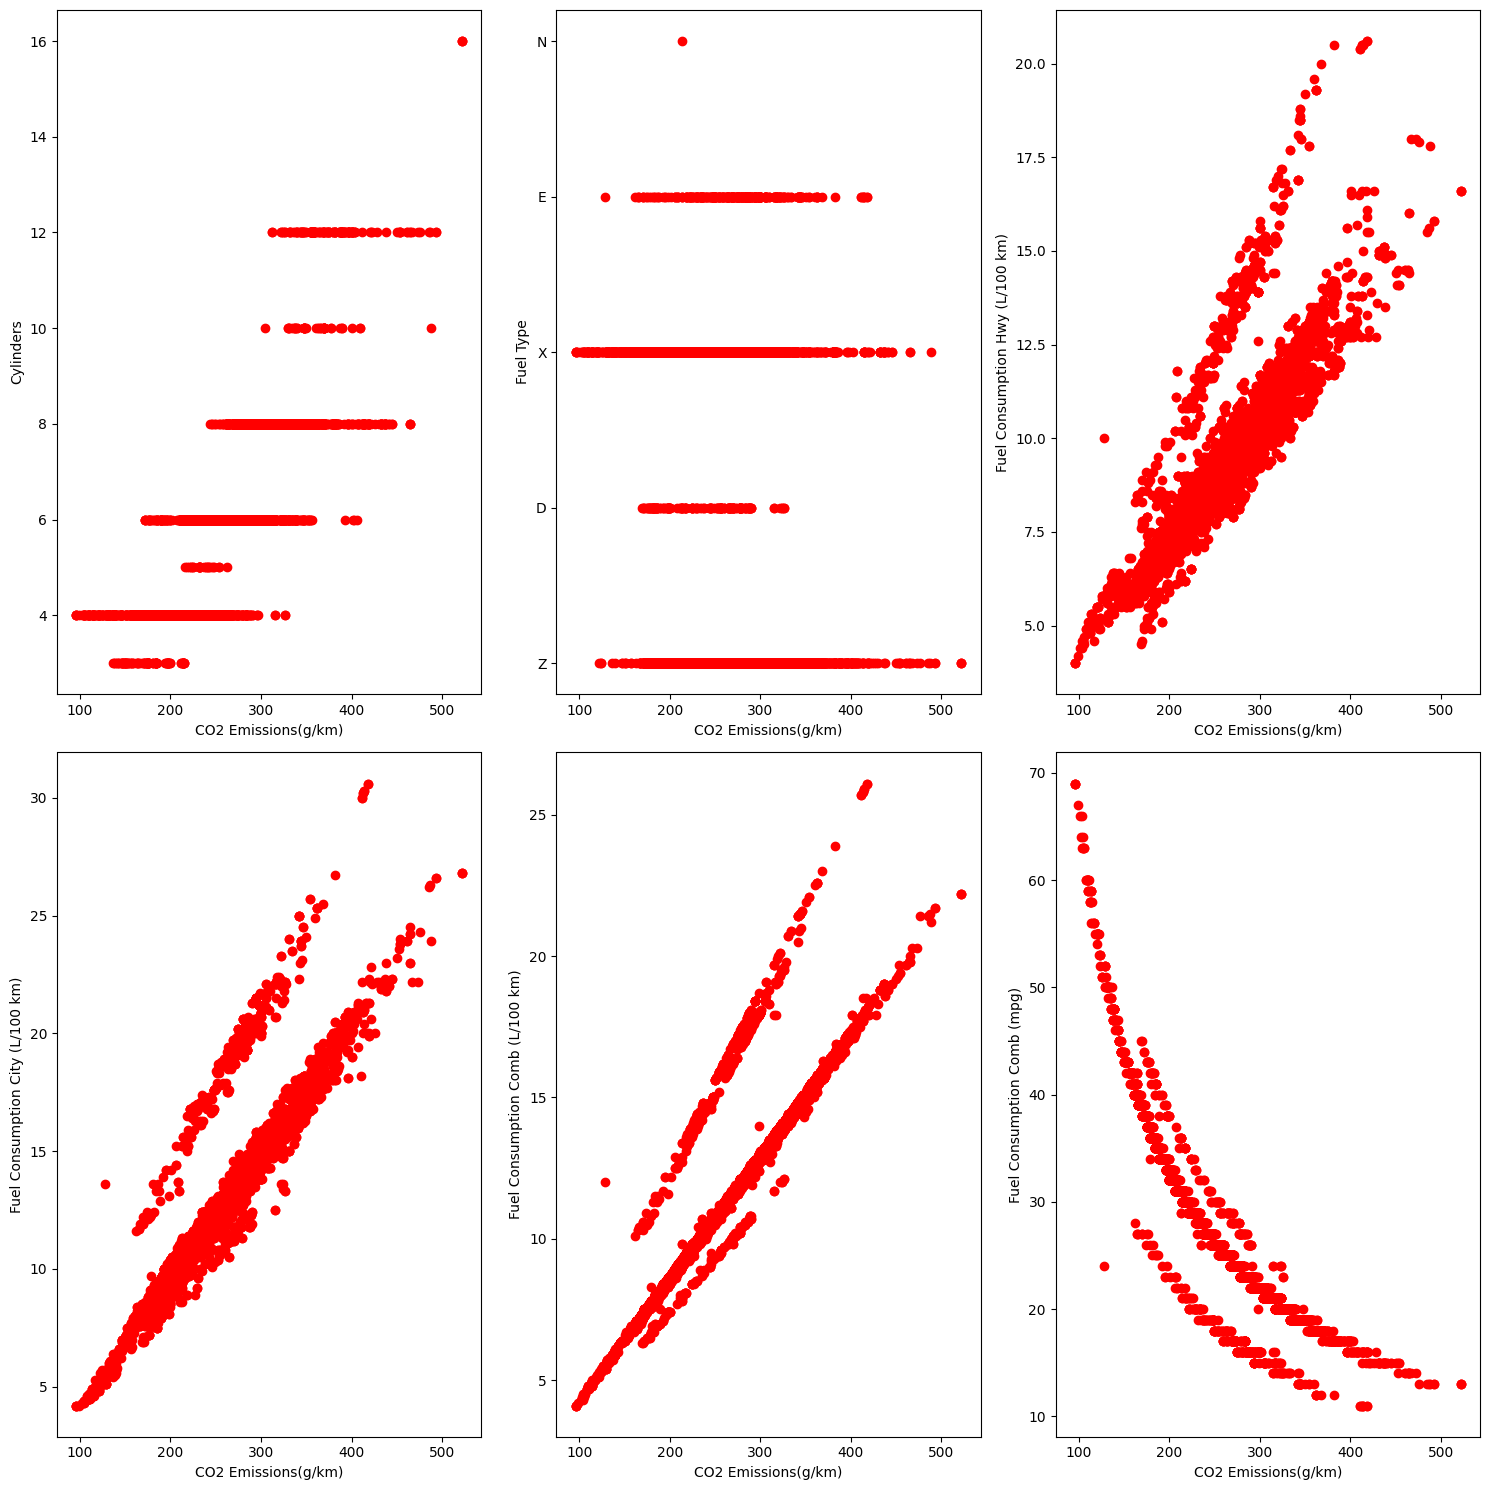

In [156]:
fig, ax = plt.subplots(2,3, figsize=(15,15))

# Making scatter plots
ax[0][0].scatter(y=dataset['Cylinders'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[0][0].set_ylabel('Cylinders')
ax[0][0].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[0][1].scatter(y=dataset['Fuel Type'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[0][1].set_ylabel('Fuel Type')
ax[0][1].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[0][2].scatter(y=dataset['Fuel Consumption Hwy (L/100 km)'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[0][2].set_ylabel('Fuel Consumption Hwy (L/100 km)')
ax[0][2].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[1][0].scatter(y=dataset['Fuel Consumption City (L/100 km)'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[1][0].set_ylabel('Fuel Consumption City (L/100 km)')
ax[1][0].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[1][1].scatter(y=dataset['Fuel Consumption Comb (L/100 km)'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[1][1].set_ylabel('Fuel Consumption Comb (L/100 km)')
ax[1][1].set_xlabel('CO2 Emissions(g/km)')

# Making scatter plots
ax[1][2].scatter(y=dataset['Fuel Consumption Comb (mpg)'],x=dataset['CO2 Emissions(g/km)'],color='red')
ax[1][2].set_ylabel('Fuel Consumption Comb (mpg)')
ax[1][2].set_xlabel('CO2 Emissions(g/km)')

plt.tight_layout()
plt.show()

##### Insight 1: Through these scatter plots we can clearly see that as the engine size increases and the no of cylinders increases, the CO2 Emissions directly increase. Thus they have a linear dependence on each other. This is also verified by the Correlation Heatmap.
##### Insight 2: Features such as Fuel Consumption Hwy (L/100 km), Fuel Consumption City (L/100 km), and Fuel Consuption Comb (L/100 km) are also linearly dependent on CO2 Emissions. As the values of these features increase, the CO2 Emissions also increases.
##### Insight 3: Fuel Consumption Comb (mpg) decreases as the CO2 Emissions increase. It can also be approximated by a linear relationship with CO2 Emissions (although it actually follows a non-linear relationship).
##### Insight 4: Through the heatmap we see that the cylinders are more correlated to the Engine Size, rather than CO2 Emissions which in turn is highly correlated to the CO2 Emissions. So, they can be considered as a derived feature of Engine Size, and has an indirect relationship to CO2 Emissions.

### Creating pair plots

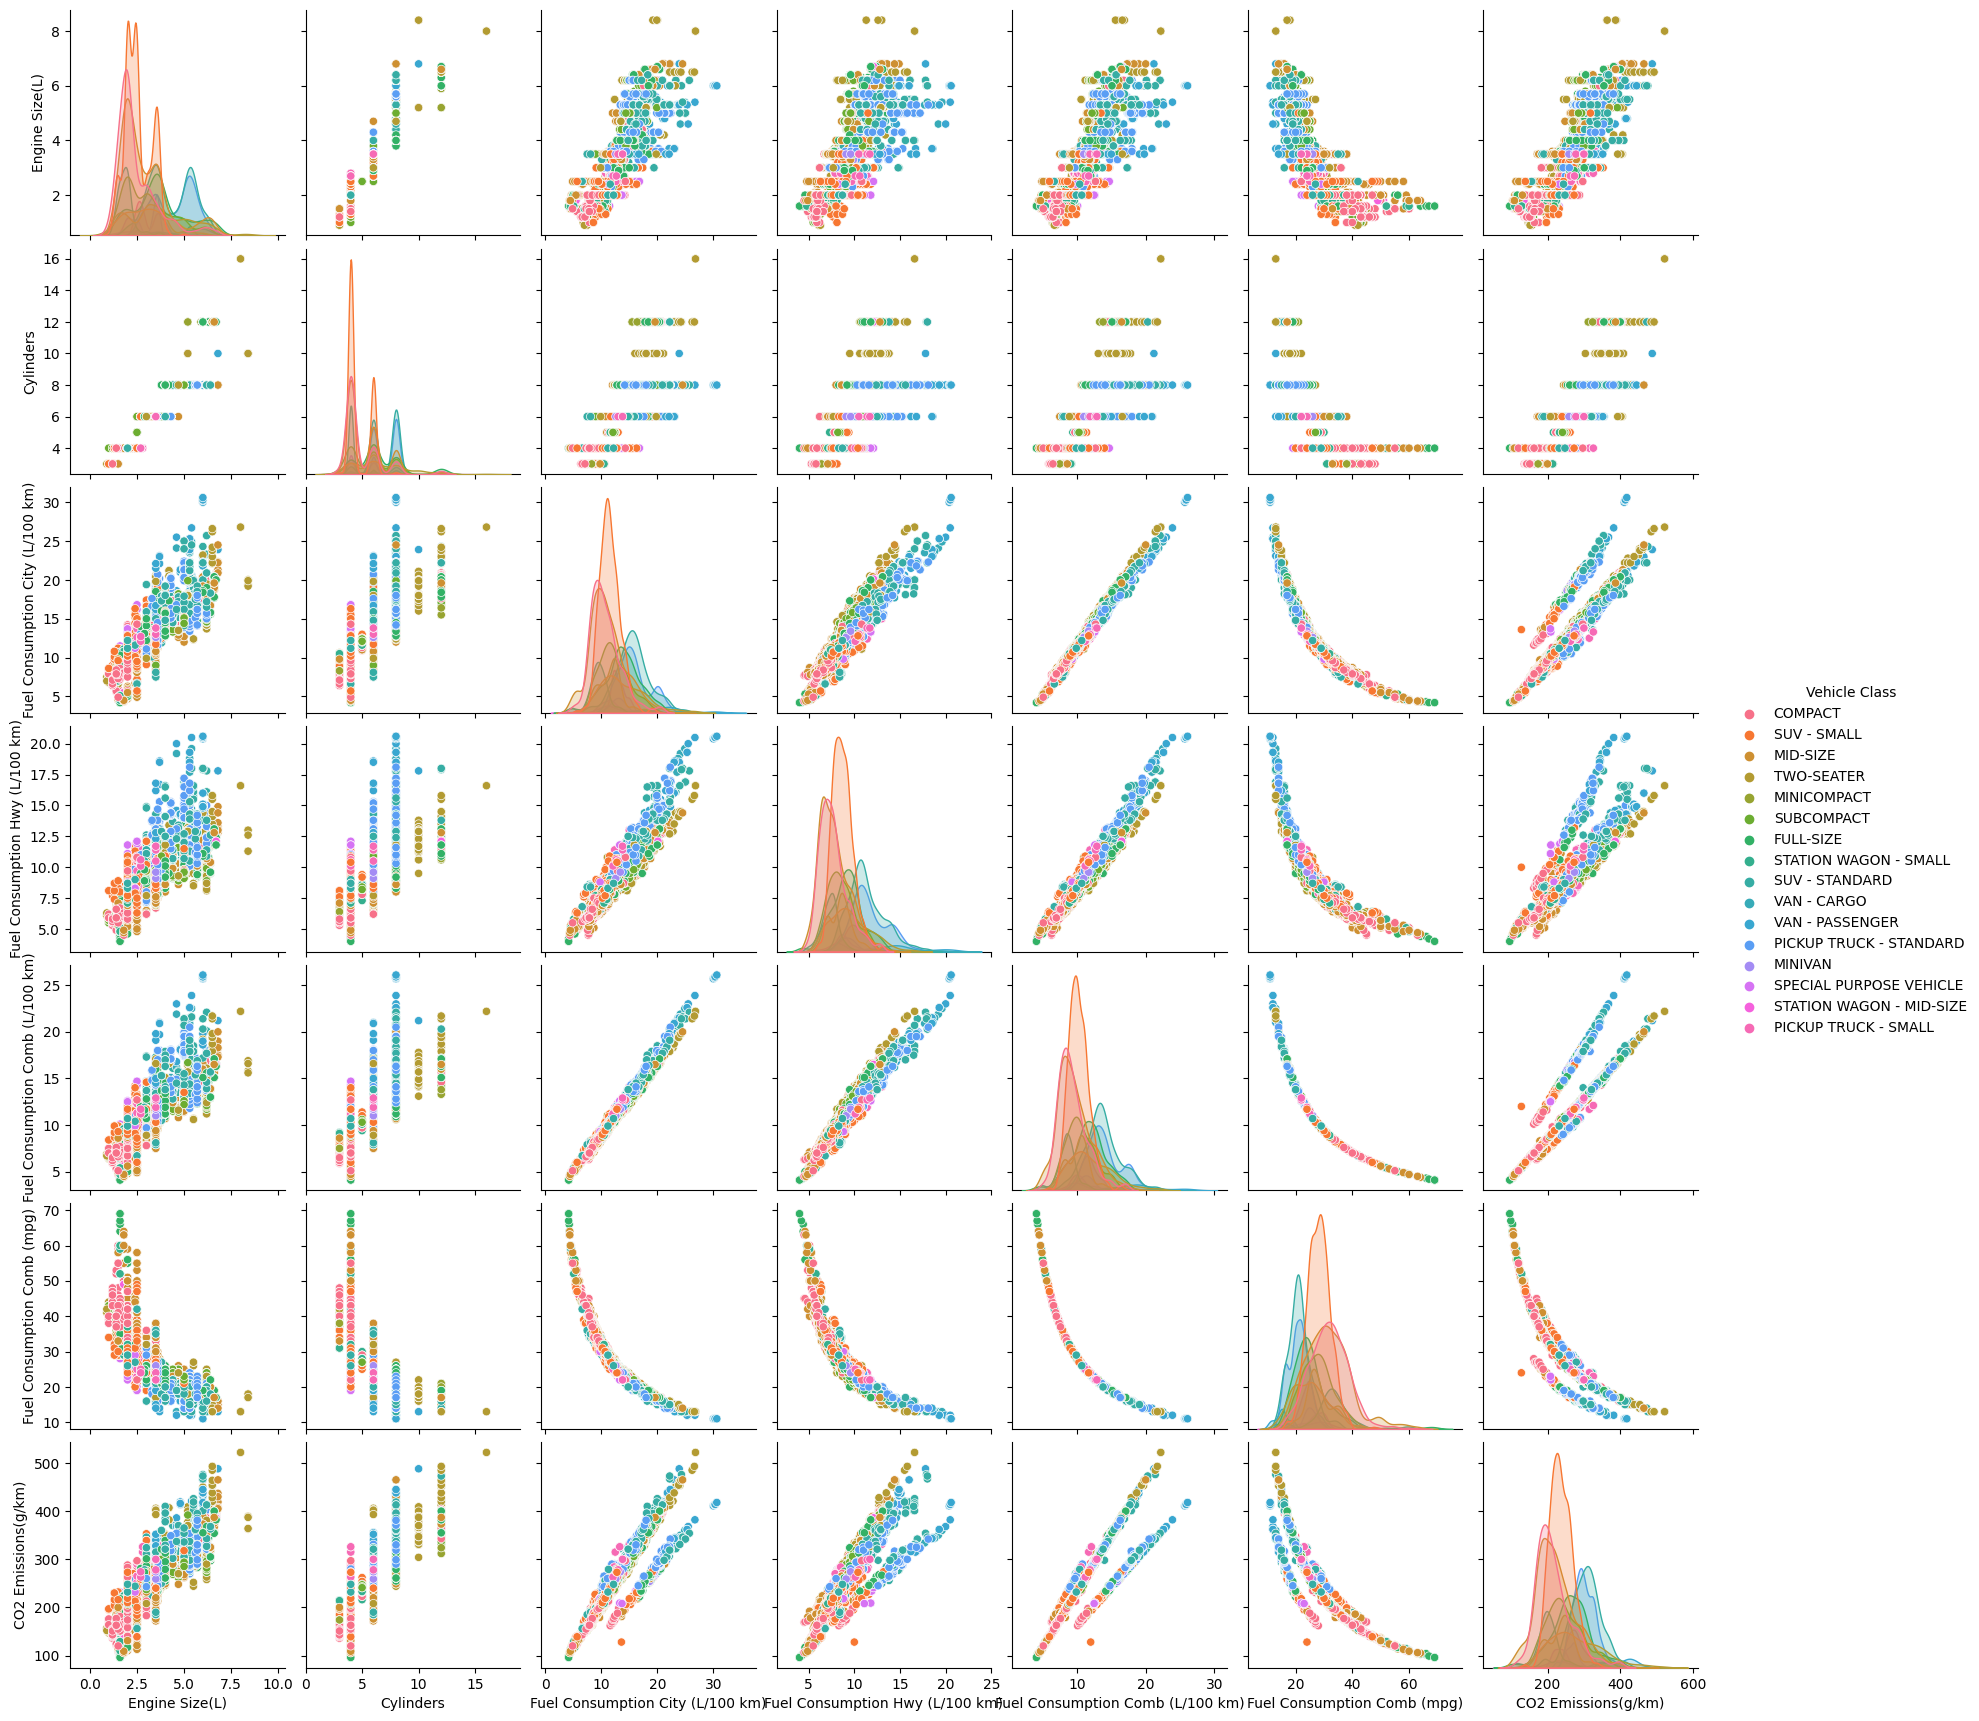

In [157]:
sns.pairplot(dataset, hue='Vehicle Class')
plt.show()

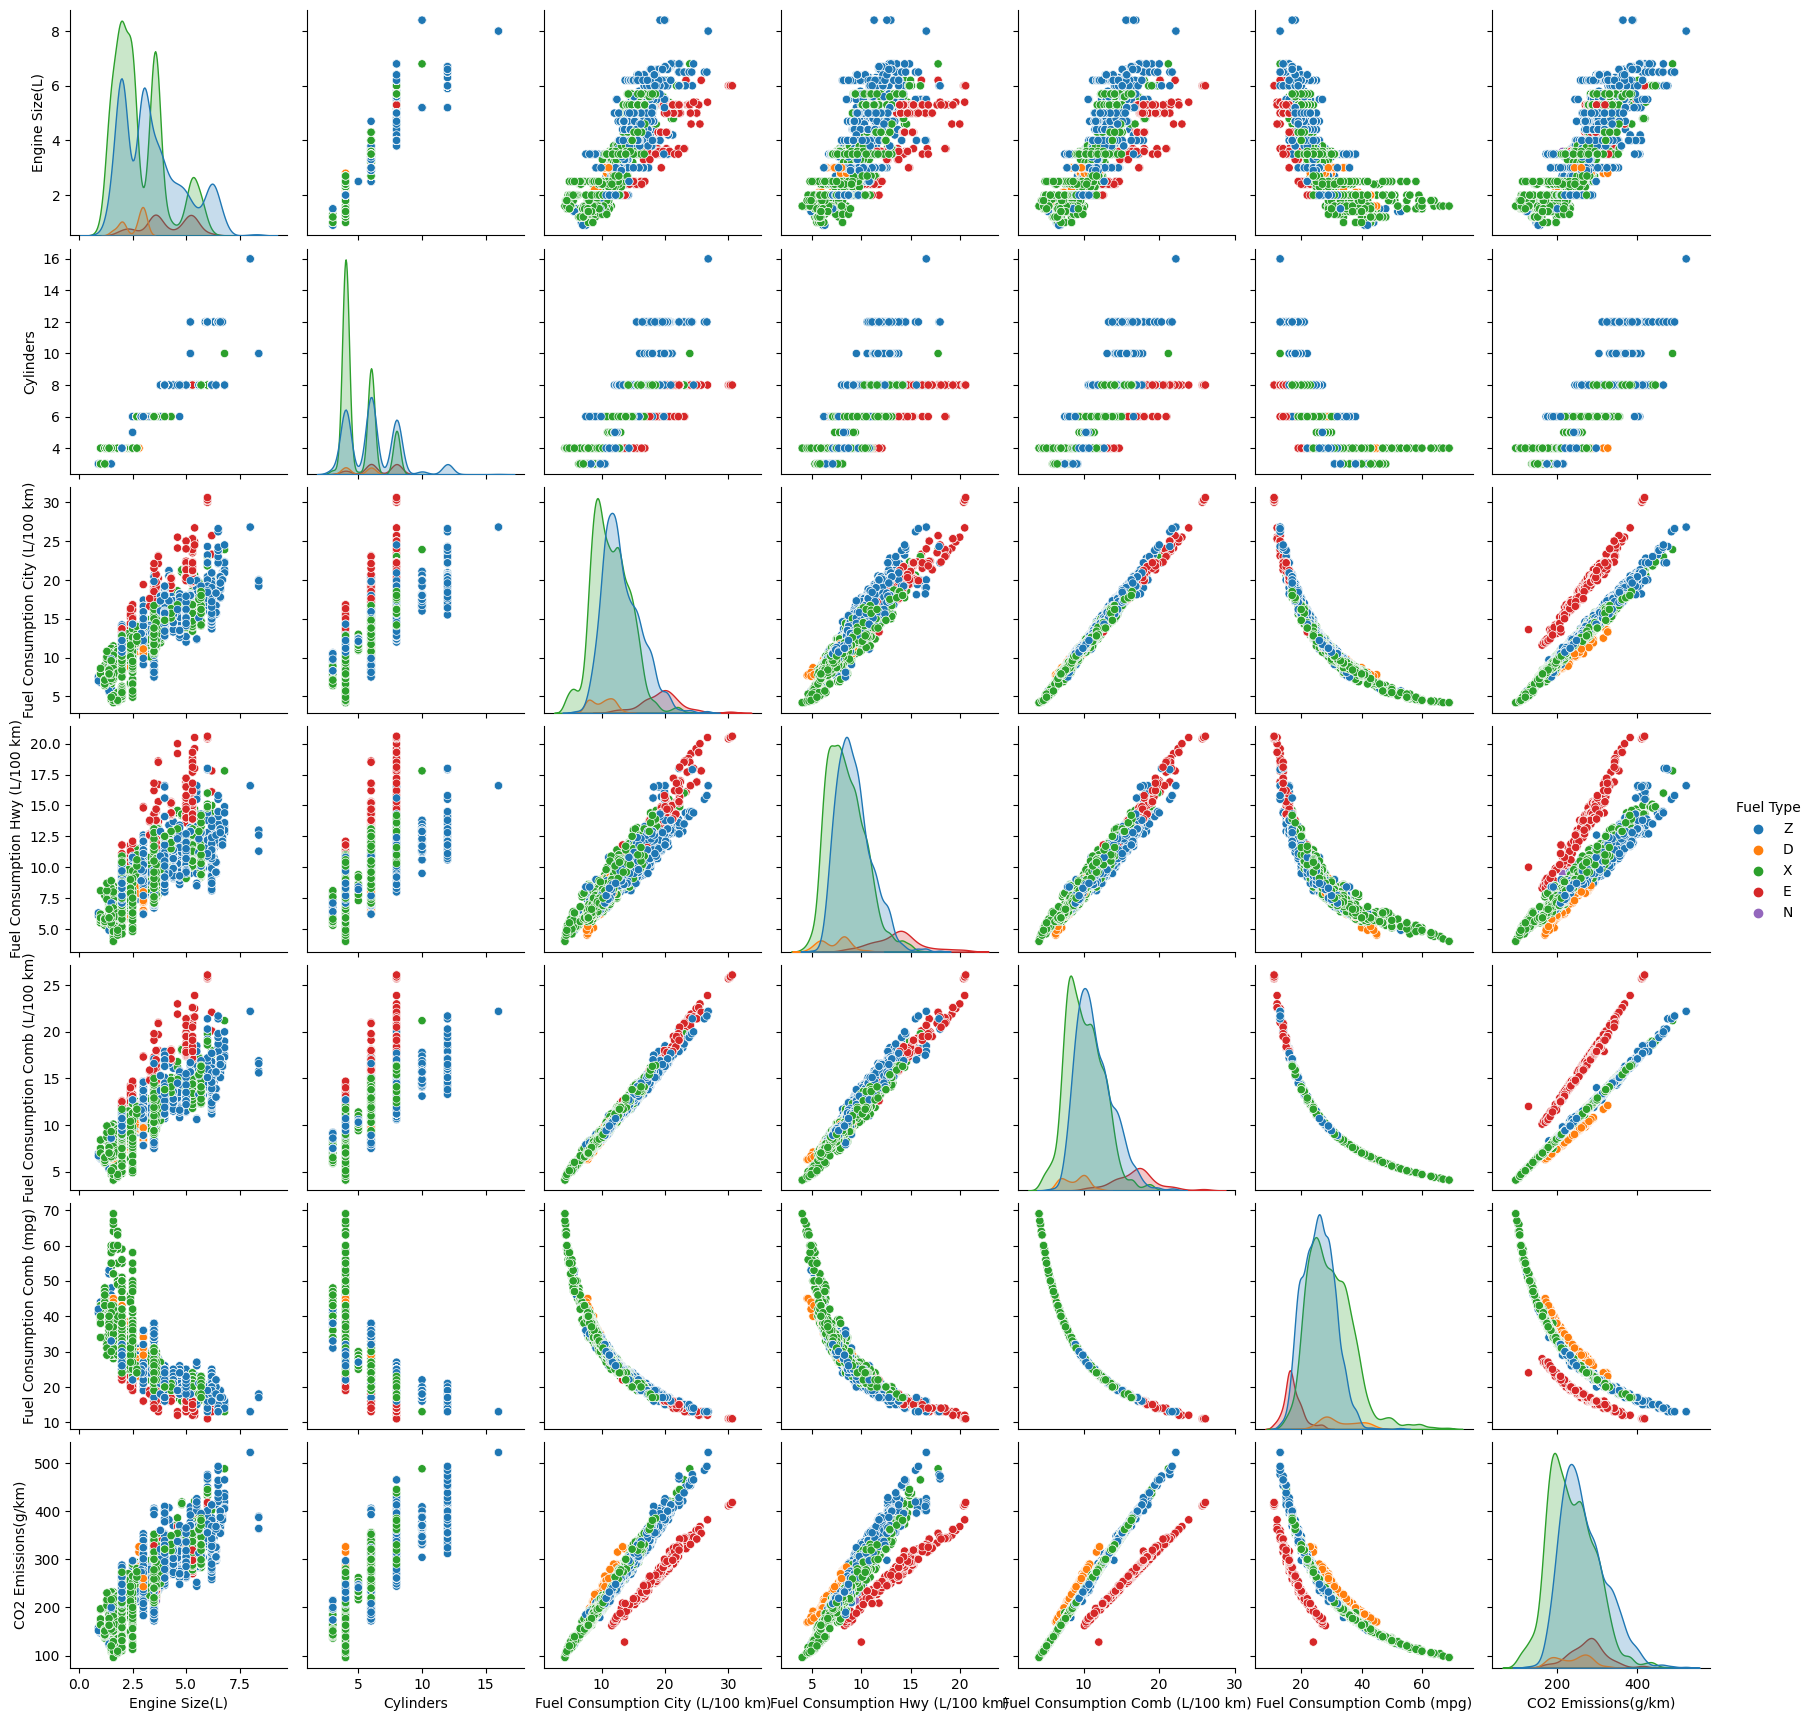

In [158]:
sns.pairplot(dataset, hue='Fuel Type')
plt.show()

##### Insight 5: We can see that vehicles using fuel type E generally is more efficient than other fuels because over the range of fuel consumption values the increase in CO2 Emissions change at a smaller pace as compared to other fuel types (Slope is smaller).

### Creating box plots

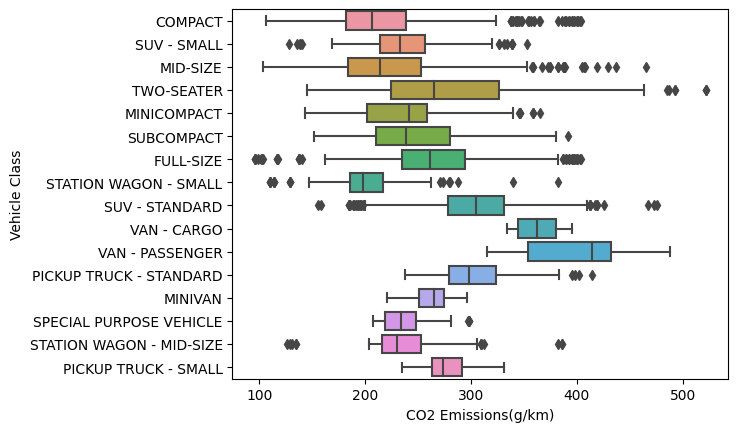

In [159]:
sns.boxplot(x='CO2 Emissions(g/km)', y='Vehicle Class', data=dataset)
plt.show()

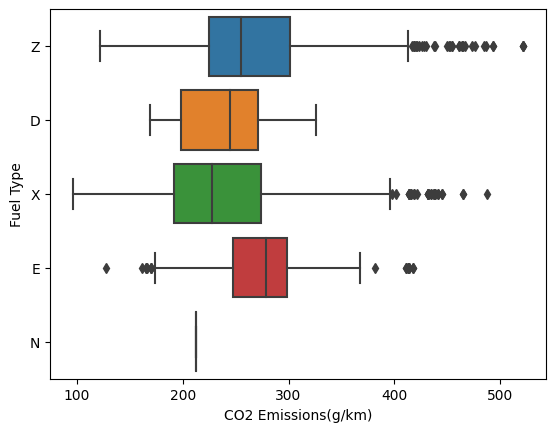

In [160]:
sns.boxplot(x='CO2 Emissions(g/km)', y='Fuel Type', data=dataset)
plt.show()

##### Insight 6: Maximum no of outliers present in the data for COMPACT cars and cars with Z fuel types.

### Creating histogram based on categorical features

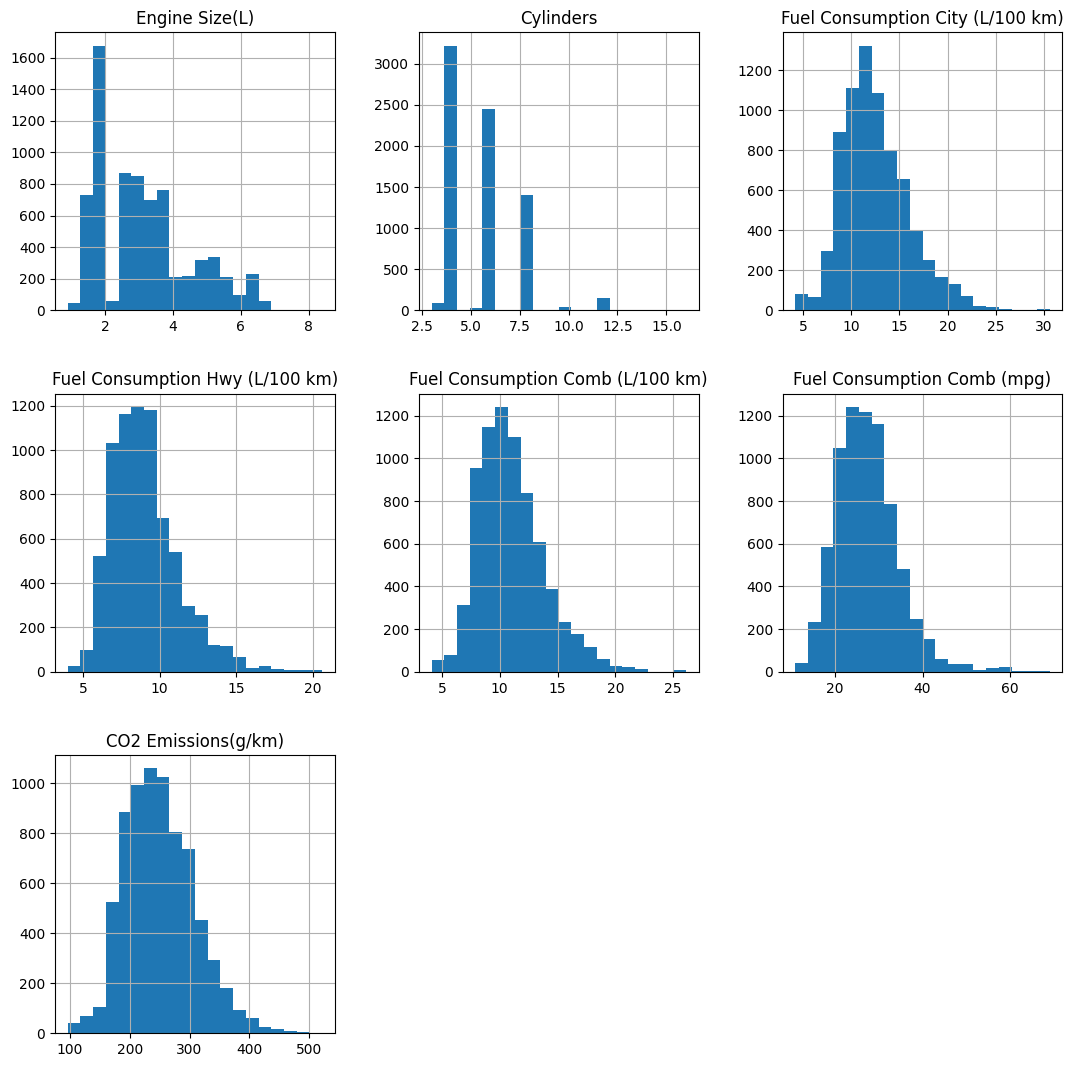

In [161]:
dataset.hist(figsize=(13,13), bins=20)
plt.show()

#### Distribution Plot

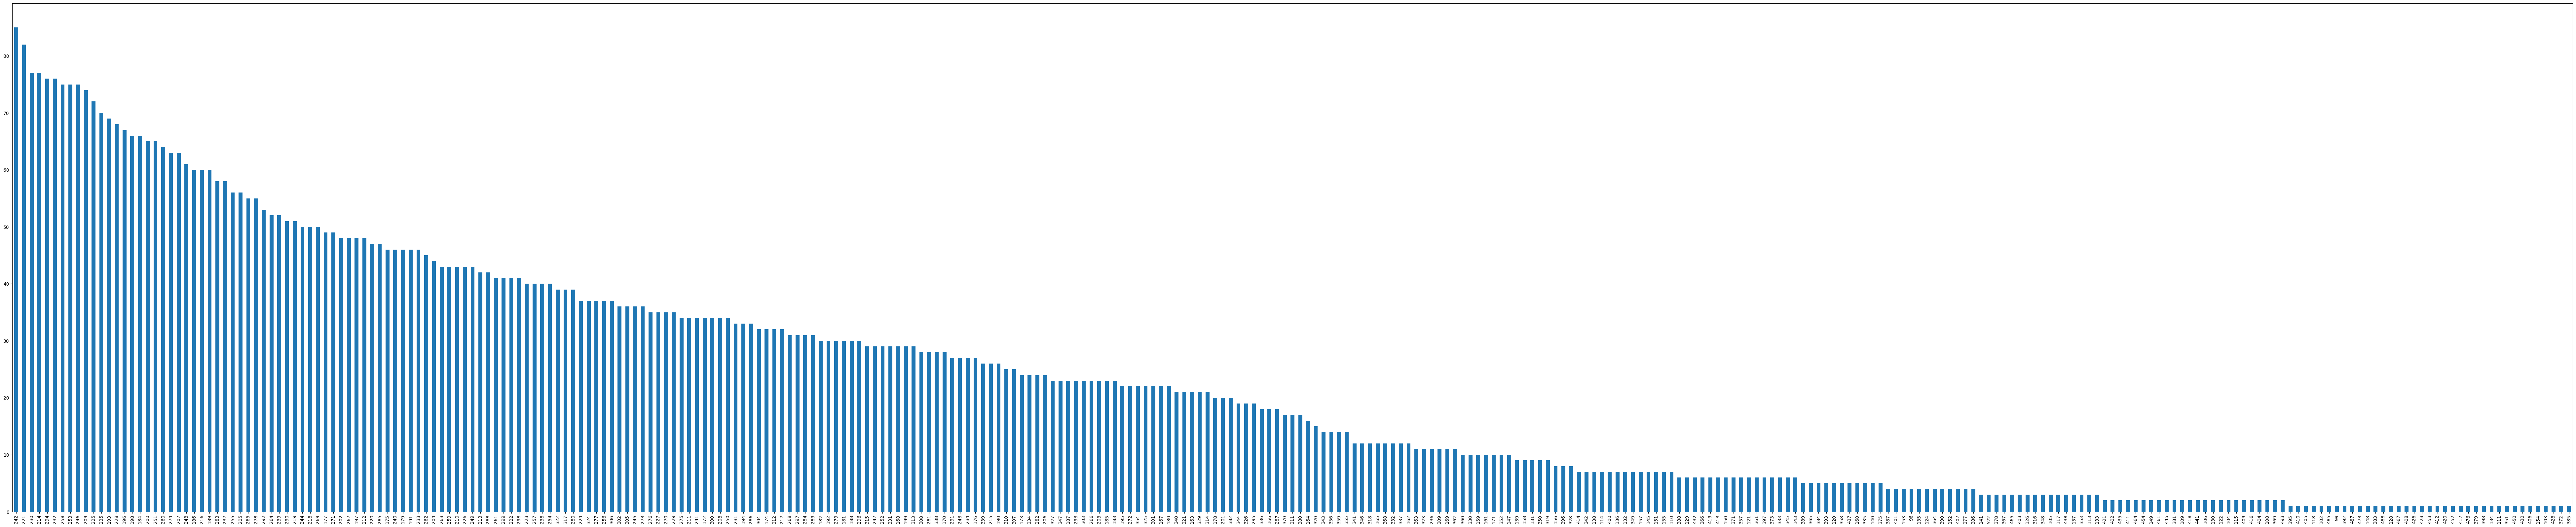

In [162]:
dataset['CO2 Emissions(g/km)'].value_counts().plot.bar(figsize=(100,20))
plt.xticks(rotation=90)
plt.show()

##### Insight 7: From here, we can see that the output labels (h(x)) is disproportionate. It is heavily imbalanced in the sense that most of the labels correspond to the first 25-30 classes in CO2 Emissions. Thus, an equal amount of test labels for each output value is not present in this data.

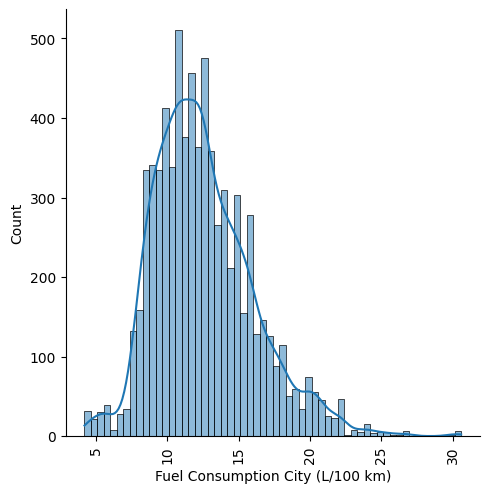

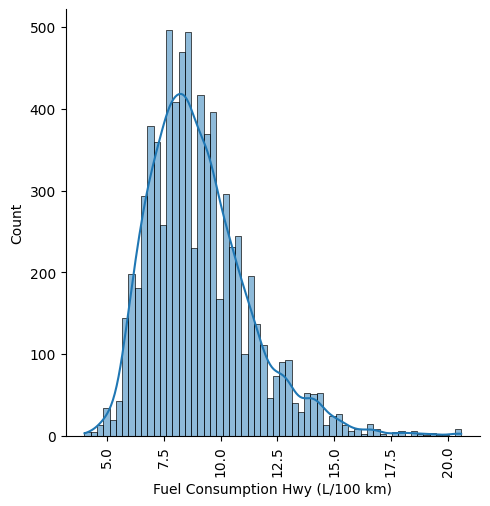

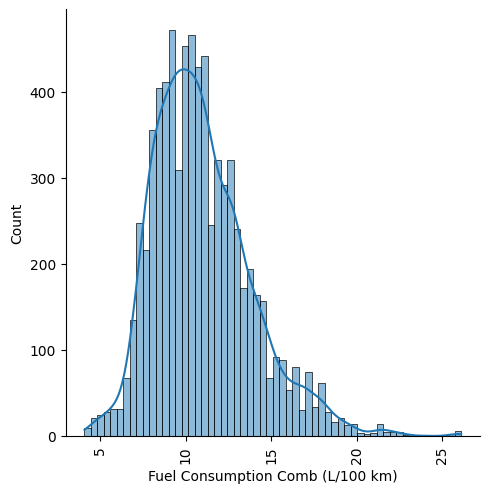

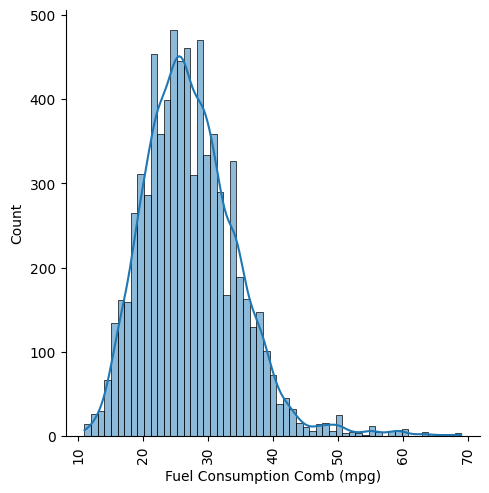

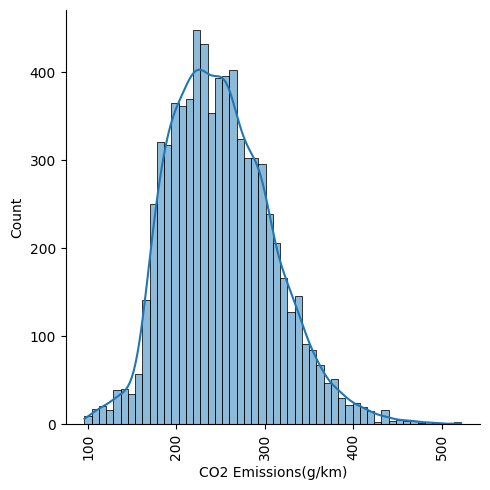

In [163]:
# sns.displot(dataset['Make'], kde=True)
# plt.xticks(rotation=90)
# plt.show()

# sns.displot(dataset['Model'], kde=True)
# plt.xticks(rotation=90)
# plt.show()

# sns.displot(dataset['Vehicle Class'], kde=True)
# plt.xticks(rotation=90)
# plt.show()

# sns.displot(dataset['Cylinders'], kde=True)
# plt.xticks(rotation=90)
# plt.show()

# sns.displot(dataset['Transmission'], kde=True)
# plt.xticks(rotation=90)
# plt.show()

# sns.displot(dataset['Fuel Type'], kde=True)
# plt.xticks(rotation=90)
# plt.show()

sns.displot(dataset['Fuel Consumption City (L/100 km)'], kde=True)
plt.xticks(rotation=90)
plt.show()

sns.displot(dataset['Fuel Consumption Hwy (L/100 km)'], kde=True)
plt.xticks(rotation=90)
plt.show()

sns.displot(dataset['Fuel Consumption Comb (L/100 km)'], kde=True)
plt.xticks(rotation=90)
plt.show()

sns.displot(dataset['Fuel Consumption Comb (mpg)'], kde=True)
plt.xticks(rotation=90)
plt.show()

# sns.displot(dataset['Engine Size(L)'], kde=True)
# plt.xticks(rotation=90)
# plt.show()

sns.displot(dataset['CO2 Emissions(g/km)'], kde=True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Insight 8: We can see that the output label CO2 Emissions follow the normal distribution approximately. Also, all fuel consumption features follow the normal distribution (approximately) too.

## Data Dimensionality Reduction using TSNE

##### (b) (2 marks) Use TSNE (t-distributed stochastic neighbour embedding) algorithm to reduce data dimensions to 2 and plot the resulting data as a scatter plot. Comment on the separability of the data.

In [164]:
# Dropping all the categories with string values
new_dataset = dataset.drop(['Fuel Type', 'Transmission', 'Make',	'Model',	'Vehicle Class'], axis=1)

In [165]:
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(new_dataset)
dimension_reduced_dataset = pd.DataFrame(X_embedded, columns=['x-coordinate', 'y-coordinate'])
# dimension_reduced_dataset['CO2 Emissions(g/km)'] = dataset['CO2 Emissions(g/km)']
dimension_reduced_dataset

x-coordinate  y-coordinate
0       -75.370506    -28.005955
1        14.453324     -9.096243
2       -25.966249     89.979645
3        24.299896    -40.343670
4        58.268246      9.731014
...            ...           ...
7380     36.410297    -48.057884
7381    -24.896458    -25.793148
7382     39.327381     15.523589
7383    -24.896458    -25.793148
7384     44.373657     -5.337776

[7385 rows x 2 columns]

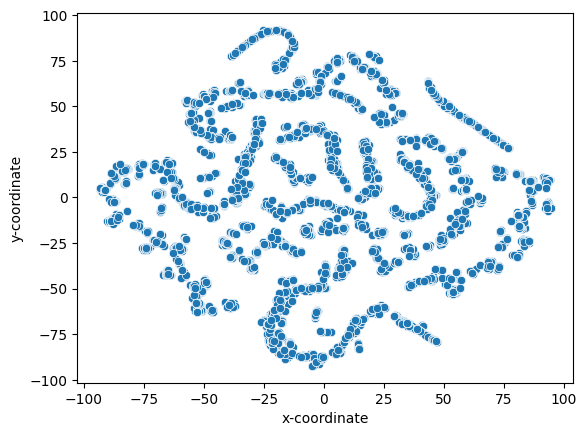

In [166]:
sns.scatterplot(data=dimension_reduced_dataset, x="x-coordinate", y="y-coordinate")#, hue='CO2 Emissions(g/km)')
plt.show()

In [167]:
X_embedded = TSNE(n_components=2, init='random', perplexity=30, n_iter=2000).fit_transform(new_dataset)
dimension_reduced_dataset_iter2000 = pd.DataFrame(X_embedded, columns=['x-coordinate', 'y-coordinate'])
dimension_reduced_dataset_iter2000

x-coordinate  y-coordinate
0        39.058380    -77.091866
1       -29.537943    -28.559408
2       -69.119217    -63.920414
3        62.828556    -20.408827
4        74.947075    -32.179317
...            ...           ...
7380    -16.816149    -44.756321
7381    -30.698692     18.631798
7382     10.685764     -3.564173
7383    -30.698692     18.631798
7384     27.630562    -19.248747

[7385 rows x 2 columns]

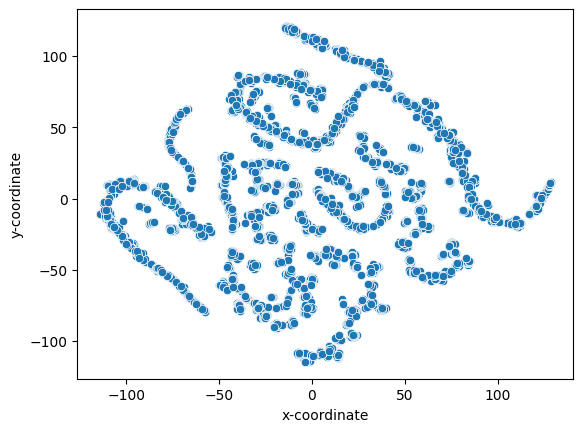

In [168]:
sns.scatterplot(data=dimension_reduced_dataset_iter2000, x="x-coordinate", y="y-coordinate")
plt.show()

##### From these TSNE plots we can see that the default parameters works well and the data looks seperable. If we increase the no of iterations on TSNE algorithm, we can see that the clusters are not very much different. So we can see that the data is saturated at 1000 iterations.

## Data Preprocessing

##### (c) (2 marks) Perform the necessary preprocessing steps, and for categorical features use label-based encoding. Perform linear regression on the preprocessed data. Report MSE, RMSE, R2 score, Adjusted R2 score, MAE on the train and test data.

### Check for null values

In [171]:
dataset.isna().sum(axis=0)

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### Using Label Based Encoding for categorical features

In [172]:
label_encoder = preprocessing.LabelEncoder()

columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
preprocessed_dataset = dataset.copy(deep=True)
for col_name in columns:
  preprocessed_dataset[col_name] = label_encoder.fit_transform(dataset[col_name])

preprocessed_dataset.head()

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0   1057              0             2.0          4            14   
1     0   1057              0             2.4          4            25   
2     0   1058              0             1.5          4            22   
3     0   1233             11             3.5          6            15   
4     0   1499             11             3.5          6            15   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0          4                               9.9   
1          4                              11.2   
2          4                               6.0   
3          4                              12.7   
4          4                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

### Preprocessing the headers

In [173]:
new_coloumn_names = ['make', 'model', 'vehicle', 'engine_size', 'cylinders', 'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'mpg_fuel_cons_comb', 'co2']
preprocessed_dataset.columns = new_coloumn_names
preprocessed_dataset.head()

make  model  vehicle  engine_size  cylinders  transmission  fuel_type  \
0     0   1057        0          2.0          4            14          4   
1     0   1057        0          2.4          4            25          4   
2     0   1058        0          1.5          4            22          4   
3     0   1233       11          3.5          6            15          4   
4     0   1499       11          3.5          6            15          4   

   fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  mpg_fuel_cons_comb  co2  
0             9.9            6.7             8.5                  33  196  
1            11.2            7.7             9.6                  29  221  
2             6.0            5.8             5.9                  48  136  
3            12.7            9.1            11.1                  25  255  
4            12.1            8.7            10.6                  27  244

##### We can see that some of the features have very high values (in thousands) and some of the features have very low values (1-10), so we need to scale the data accordingly.

### Scaling the data using StandardScaler()

In [174]:
scaler = StandardScaler()

In [175]:
model = scaler.fit(preprocessed_dataset)
scaled_data = model.transform(preprocessed_dataset)
preprocessed_dataset_scaled = pd.DataFrame(scaled_data, columns=new_coloumn_names)
preprocessed_dataset_scaled

make     model   vehicle  engine_size  cylinders  transmission  \
0    -1.730214  0.057785 -1.319720    -0.856721  -0.883408     -0.003824   
1    -1.730214  0.057785 -1.319720    -0.561317  -0.883408      1.511325   
2    -1.730214  0.059519 -1.319720    -1.225976  -0.883408      1.098102   
3    -1.730214  0.362820  0.961192     0.251043   0.210575      0.133917   
4    -1.730214  0.823839  0.961192     0.251043   0.210575      0.133917   
...        ...       ...       ...          ...        ...           ...   
7380  1.894621  1.607224  0.961192    -0.856721  -0.883408      0.409399   
7381  1.894621  1.617623  0.961192    -0.856721  -0.883408      0.409399   
7382  1.894621  1.622822  0.961192    -0.856721  -0.883408      0.409399   
7383  1.894621  1.636687  1.168548    -0.856721  -0.883408      0.409399   
7384  1.894621  1.638420  1.168548    -0.856721  -0.883408      0.409399   

      fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
0      0.836161       -0.759002      -1.052781       -0.855742   
1      0.836161       -0.387577      -0.603202       -0.475423   
2      0.836161       -1.873275      -1.457401       -1.754677   
3      0.836161        0.040990       0.026208        0.043193   
4      0.836161       -0.130437      -0.153624       -0.129679   
...         ...             ...            ...             ...   
7380   0.836161       -0.530433      -0.603202       -0.544572   
7381   0.836161       -0.387577      -0.333455       -0.371700   
7382   0.836161       -0.244721      -0.198582       -0.233402   
7383   0.836161       -0.387577      -0.333455       -0.371700   
7384   0.836161       -0.101866      -0.153624       -0.095104   

      mpg_fuel_cons_comb       co2  
0               0.763110 -0.932933  
1               0.209966 -0.505646  
2               2.837400 -1.958421  
3              -0.343178  0.075464  
4              -0.066606 -0.112542  
...                  ...       ...  
7380            0.348252 -0.539829  
7381            0.209966 -0.317640  
7382           -0.066606 -0.180908  
7383            0.209966 -0.317640  
7384           -0.204892 -0.044176  

[7385 rows x 12 columns]

In [176]:
scaled_data_tsne = scaler.fit(dimension_reduced_dataset).transform(dimension_reduced_dataset)
preprocessed_dataset_tsne_scaled = pd.DataFrame(scaled_data_tsne, columns=["x-coordinate", "y-coordinate"])
preprocessed_dataset_tsne_scaled

x-coordinate  y-coordinate
0        -1.732271     -0.627884
1         0.327129     -0.195044
2        -0.599575      2.072784
3         0.552882     -0.910291
4         1.331678      0.235908
...            ...           ...
7380      0.830539     -1.086868
7381     -0.575047     -0.577233
7382      0.897419      0.368499
7383     -0.575047     -0.577233
7384      1.013115     -0.109013

[7385 rows x 2 columns]

## Applying Linear Regression Model

### Splitting the data into train-test-split

In [177]:
# LR without scaling
X = preprocessed_dataset.drop(['co2'], axis=1)
Y = preprocessed_dataset['co2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

In [178]:
# LR on scaled dataset
X_scaled = preprocessed_dataset_scaled.drop(['co2'], axis=1)
Y_scaled = preprocessed_dataset_scaled['co2']
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=101, shuffle=True)

In [179]:
# LR on scaled tsne dataset
X_train_tsne, X_test_tsne, Y_train_tsne, Y_test_tsne = train_test_split(dimension_reduced_dataset["x-coordinate"], dimension_reduced_dataset["y-coordinate"], test_size=0.2, random_state=101, shuffle=True)
X_train_tsne = X_train_tsne.values.reshape(-1, 1)
X_test_tsne = X_test_tsne.values.reshape(-1, 1)

### Applying Linear Regression

##### LR without scaling

In [180]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

In [181]:
Y_train_pred = linear_regression_model.predict(X_train)
Y_pred = linear_regression_model.predict(X_test)

##### LR with scaling

In [182]:
linear_regression_model_scaled = LinearRegression()
linear_regression_model_scaled.fit(X_train_scaled, Y_train_scaled)

LinearRegression()

In [183]:
Y_train_pred_scaled = linear_regression_model_scaled.predict(X_train_scaled)
Y_pred_scaled = linear_regression_model_scaled.predict(X_test_scaled)

##### LR with scaled tsne data

In [184]:
linear_regression_model_tsne = LinearRegression()
linear_regression_model_tsne.fit(X_train_tsne, Y_train_tsne)

LinearRegression()

In [185]:
Y_train_pred_tsne = linear_regression_model_tsne.predict(X_train_tsne)
Y_pred_tsne = linear_regression_model_tsne.predict(X_test_tsne)

### Evaluating the Model

In [186]:
def train_test_scores(y_train, y_train_pred, y_test, y_pred, heading="Linear Regression"):
    print(heading)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)
    n = dataset.shape[0]
    p = dataset.shape[1] - 1
    scores = {"Training Scores":
    {"R2" : r2_train,
    "Adjusted R2" : 1 - (1-r2_train) * (n-1) / (n-p-1),
    "MAE" : mean_absolute_error(y_train, y_train_pred),
    "MSE" : mean_squared_error(y_train, y_train_pred),
    "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "Testing Scores":
    {"R2" : r2_test,
    "Adjusted R2" : 1 - (1-r2_test) * (n-1) / (n-p-1),
    "MAE" : mean_absolute_error(y_test, y_pred),
    "MSE" : mean_squared_error(y_test, y_pred),
    "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

In [187]:
score = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, "Linear Regression without scaling the data\n")
score

Linear Regression without scaling the data



Training Scores  Testing Scores
R2                  0.916719        0.912561
Adjusted R2         0.916595        0.912431
MAE                11.000123       11.105291
MSE               286.689832      292.192627
RMSE               16.931918       17.093643

In [188]:
score = train_test_scores(Y_train_scaled, Y_train_pred_scaled, Y_test_scaled, Y_pred_scaled, "Linear Regression with scaling the data\n")
score

Linear Regression with scaling the data



Training Scores  Testing Scores
R2                  0.916719        0.912561
Adjusted R2         0.916595        0.912431
MAE                 0.188008        0.189806
MSE                 0.083747        0.085355
RMSE                0.289391        0.292155

In [189]:
score = train_test_scores(Y_train_tsne, Y_train_pred_tsne, Y_test_tsne, Y_pred_tsne, "Linear Regression with scaled tsne data\n")
score

Linear Regression with scaled tsne data



Training Scores  Testing Scores
R2                  0.000989        0.001662
Adjusted R2        -0.000502        0.000173
MAE                36.093987       35.145035
MSE              1927.671143     1821.589355
RMSE               43.905251       42.680080

##### (d) (2 marks) Use Principal Component Analysis (PCA) on the original dataset to reduce the number of features and then train the model with the reduced feature dataset. Vary the number of components, i.e. 4, 6, 8, 10 and compare the results (MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the train and test dataset.

## Applying PCA on the dataset

In [190]:
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [191]:
no_of_components = [4, 6, 8, 10]

for component in no_of_components:
    pca = PCA(n_components=component)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model_pca = LinearRegression()
    model_pca.fit(X_train_pca, Y_train)

    Y_pred = model_pca.predict(X_test_pca)
    Y_train_pred = model_pca.predict(X_train_pca)

    score_pca = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, f"Linear Regression: PCA with {component} components\n")
    print(score_pca)
    print('\n--------------------------------------------------------------\n')

Linear Regression: PCA with 4 components

             Training Scores  Testing Scores
R2                  0.868780        0.862546
Adjusted R2         0.868584        0.862341
MAE                13.689420       13.769711
MSE               451.718553      459.326465
RMSE               21.253672       21.431903

--------------------------------------------------------------

Linear Regression: PCA with 6 components

             Training Scores  Testing Scores
R2                  0.892598        0.886248
Adjusted R2         0.892438        0.886078
MAE                11.026544       11.085245
MSE               369.726643      380.124762
RMSE               19.228277       19.496789

--------------------------------------------------------------

Linear Regression: PCA with 8 components

             Training Scores  Testing Scores
R2                  0.915861        0.911741
Adjusted R2         0.915735        0.911610
MAE                11.080187       11.198283
MSE               289.64

##### We can see that PCA values saturate around 8 components

##### (e) (2 marks) Encode the categorical features of the original dataset with one-hot encoding and perform all tasks of part c again, i.e. apply linear regression and report MSE, RMSE etc. Compare the results obtained with part c.

## Applying One Hot Encoding

In [192]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [193]:
# Finding count of unique values
coloumn_name = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

# for name in coloumn_name:
#     print(name, end='\n\n')
#     print(dataset[name].value_counts())
#     print("\n------------------------------------")

one_hot_encoded_data = pd.get_dummies(dataset, columns = coloumn_name)
one_hot_encoded_data

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_ACURA  \
0                              33                  196           1   
1                              29                  221           1   
2                              48                  136           1   
3                              25                  255           1   
4                              27                  244           1   
...                           ...                  ...         ...   
7380                           30                  219           0   
7381                           29                  232           0   
7382                           27                  240           0   
7383                           29                  232           0   
7384                           26                  248           0   

      Make_ALFA ROMEO  Make_ASTON MARTIN  ...  Transmission_AV7  \
0                   0                  0  ...                 0   
1                   0                  0  ...                 0   
2                   0                  0  ...                 1   
3                   0                  0  ...                 0   
4                   0                  0  ...                 0   
...               ...                ...  ...               ...   
7380                0                  0  ...                 0   
7381                0                  0  ...                 0   
7382                0                  0  ...                 0   
7383                0                  0  ...                 0   
7384                0                  0  ...                 0   

      Transmission_AV8  Transmission_M5  Transmission_M6  Transmission_M7  \
0                    0                0                0                0   
1                    0                0                1                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
7380                 0                0                0                0   
7381          

In [194]:
# Applying Linear Regression
X = one_hot_encoded_data.drop(['CO2 Emissions(g/km)'], axis=1)
Y = one_hot_encoded_data['CO2 Emissions(g/km)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)#, stratify=one_hot_encoded_data['CO2 Emissions(g/km)'])

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

Y_train_pred = linear_regression_model.predict(X_train)
Y_pred = linear_regression_model.predict(X_test)

score = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, "Linear Regression with One Hot Encoding\n")
score

Linear Regression with One Hot Encoding



Training Scores  Testing Scores
R2                  0.997440   -3.311173e+16
Adjusted R2         0.997436   -3.316113e+16
MAE                 1.905824    1.867121e+09
MSE                 8.813834    1.106490e+20
RMSE                2.968810    1.051898e+10

##### (f) (2 marks) Perform PCA on the one-hot encoded dataset and choose the appropriate number of components (try 5 different values). Compare the results (MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the train and test dataset.

In [208]:
no_of_components = [4, 6, 8, 10, 12, 120]
# no_of_components = [200]#range(2, 202, 2)
# answer = 1000000
# component_ans = []
for component in no_of_components:
    pca = PCA(n_components=component)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model_pca = LinearRegression()
    model_pca.fit(X_train_pca, Y_train)

    Y_pred = model_pca.predict(X_test_pca)
    Y_train_pred = model_pca.predict(X_train_pca)

    score_pca = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, f"Linear Regression: PCA with {component} components on one hot encoding\n")
    print(score_pca)
    print('\n--------------------------------------------------------------\n')
    # if answer > ((score_pca['Testing Scores']['MSE'] + score_pca['Training Scores']['MSE'])/2):
    #   answer = ((score_pca['Testing Scores']['MSE'] + score_pca['Training Scores']['MSE'])/2)
    #   component_ans.append(component)

# print(component_ans)



Linear Regression: PCA with 4 components on one hot encoding

             Training Scores  Testing Scores
R2                  0.903233        0.899983
Adjusted R2         0.903089        0.899833
MAE                11.545269       11.458312
MSE               333.115439      334.226382
RMSE               18.251450       18.281859

--------------------------------------------------------------

Linear Regression: PCA with 6 components on one hot encoding

             Training Scores  Testing Scores
R2                  0.906047        0.902382
Adjusted R2         0.905907        0.902236
MAE                11.357122       11.345453
MSE               323.429498      326.208325
RMSE               17.984146       18.061238

--------------------------------------------------------------

Linear Regression: PCA with 8 components on one hot encoding

             Training Scores  Testing Scores
R2                  0.906110        0.902642
Adjusted R2         0.905970        0.902496
MAE      

##### Insight: Performed cross validation on the above with no of components varying between 2 to 200. Got the ordered list of alpha where -
##### alpha = [2, 4, 6, 8, 12, 14, 16, 18, 20, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 92, 94, 96, 102, 106, 108, 110, 112, 122, 132, 134, 136, 138, 140, 154, 160, 164, 176, 194, 198]
##### in increasing order of performance.

##### (g) (1.5 marks) Use L1 and L2 regularization while training the linear model (use the preprocessed dataset of part c). Compare the MSE, RMSE, R2 score, Adjusted R2 score, and MAE on the test dataset for both regularization techniques.

In [196]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

### L1 (Lasso) Regularization

In [197]:
lamda_space = np.linspace(0.1, 2, 20)

for lamda in lamda_space:
    lasso_model = Lasso(alpha=lamda, random_state=101)
    lasso_model.fit(X_train, Y_train)

    Y_pred = lasso_model.predict(X_test)
    Y_train_pred = lasso_model.predict(X_train)

    scores = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, f"\tLR with Lasso regularization and alpha={lamda}\n")
    print(scores)
    print('------------------------------------------------------------------\n')

	LR with Lasso regularization and alpha=0.1

             Training Scores  Testing Scores
R2                  0.992687        0.990752
Adjusted R2         0.992677        0.990738
MAE                 3.127165        3.160310
MSE                25.173065       30.904091
RMSE                5.017277        5.559145
------------------------------------------------------------------

	LR with Lasso regularization and alpha=0.2

             Training Scores  Testing Scores
R2                  0.991863        0.990064
Adjusted R2         0.991851        0.990049
MAE                 3.392128        3.430774
MSE                28.010699       33.201904
RMSE                5.292514        5.762109
------------------------------------------------------------------

	LR with Lasso regularization and alpha=0.3

             Training Scores  Testing Scores
R2                  0.990534        0.988795
Adjusted R2         0.990520        0.988778
MAE                 3.703618        3.754323
MSE      

##### We can see that L1 regularization performs best with alpha = 0.1

### L2 (Ridge) Regularization

In [198]:
lamda_space = np.linspace(0.1, 2, 20)

for lamda in lamda_space:
    ridge_model = Ridge(alpha=lamda, random_state=101)
    ridge_model.fit(X_train, Y_train)

    Y_pred = ridge_model.predict(X_test)
    Y_train_pred = ridge_model.predict(X_train)

    scores = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, f"\tLR with Ridge regularization and alpha={lamda}\n")
    print(scores)
    print('---------------------------------------------------------------\n')

	LR with Ridge regularization and alpha=0.1

             Training Scores  Testing Scores
R2                  0.997359        0.992820
Adjusted R2         0.997356        0.992809
MAE                 1.914047        3.039813
MSE                 9.089816       23.993202
RMSE                3.014932        4.898286
---------------------------------------------------------------

	LR with Ridge regularization and alpha=0.2

             Training Scores  Testing Scores
R2                  0.997252        0.993024
Adjusted R2         0.997248        0.993014
MAE                 1.942406        2.970572
MSE                 9.459199       23.310747
RMSE                3.075581        4.828120
---------------------------------------------------------------

	LR with Ridge regularization and alpha=0.3

             Training Scores  Testing Scores
R2                  0.997153        0.993108
Adjusted R2         0.997149        0.993098
MAE                 1.972556        2.934363
MSE            

##### We can see that Ridge regularization performs best around alpha = 1

##### (h) (1.5 marks) Use SGDRegressor library to perform linear regression on the preprocessed dataset of part c. Report the evaluation metrics and compare the result.

In [199]:
from sklearn.linear_model import SGDRegressor

In [200]:
sgd = SGDRegressor(penalty='l1', alpha=0.01, max_iter = 1000, shuffle=True)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)
Y_train_pred = sgd.predict(X_train)

score = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, f"Linear Regression: Using SGD with L1 regularization\n")
score

Linear Regression: Using SGD with L1 regularization



Training Scores  Testing Scores
R2             -4.020890e+14   -3.627918e+14
Adjusted R2    -4.026888e+14   -3.633331e+14
MAE             8.414269e+08    7.481479e+08
MSE             1.384173e+18    1.212336e+18
RMSE            1.176509e+09    1.101061e+09

In [201]:
sgd = SGDRegressor(penalty='l2', alpha=0.01, max_iter = 1000, shuffle=True)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)
Y_train_pred = sgd.predict(X_train)

score = train_test_scores(Y_train, Y_train_pred, Y_test, Y_pred, f"Linear Regression: Using SGD with L2 regularization\n")
score

Linear Regression: Using SGD with L2 regularization



Training Scores  Testing Scores
R2             -7.179577e+11   -8.209332e+11
Adjusted R2    -7.190288e+11   -8.221580e+11
MAE             3.493740e+07    3.540703e+07
MSE             2.471537e+15    2.743300e+15
RMSE            4.971455e+07    5.237652e+07

##### We can see that using SGD the performance drastically reduces. Also, L2 regularization has a better performance than L1 regularization in SGD.